In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age','sex','cp','restbp','chol','fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
df[df['ca']=='?']

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
#dropping the unwanted values
to_drop = list(df[df['ca']=='?'].index.values) + list(df[df['thal']=='?'].index.values)
df.drop(to_drop, axis=0, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [10]:
#converting thal and ca to numeric
df['ca']=pd.to_numeric(df['ca'])
df['thal']=pd.to_numeric(df['thal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    float64
 12  thal     297 non-null    float64
 13  hd       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


<Axes: xlabel='hd', ylabel='thalach'>

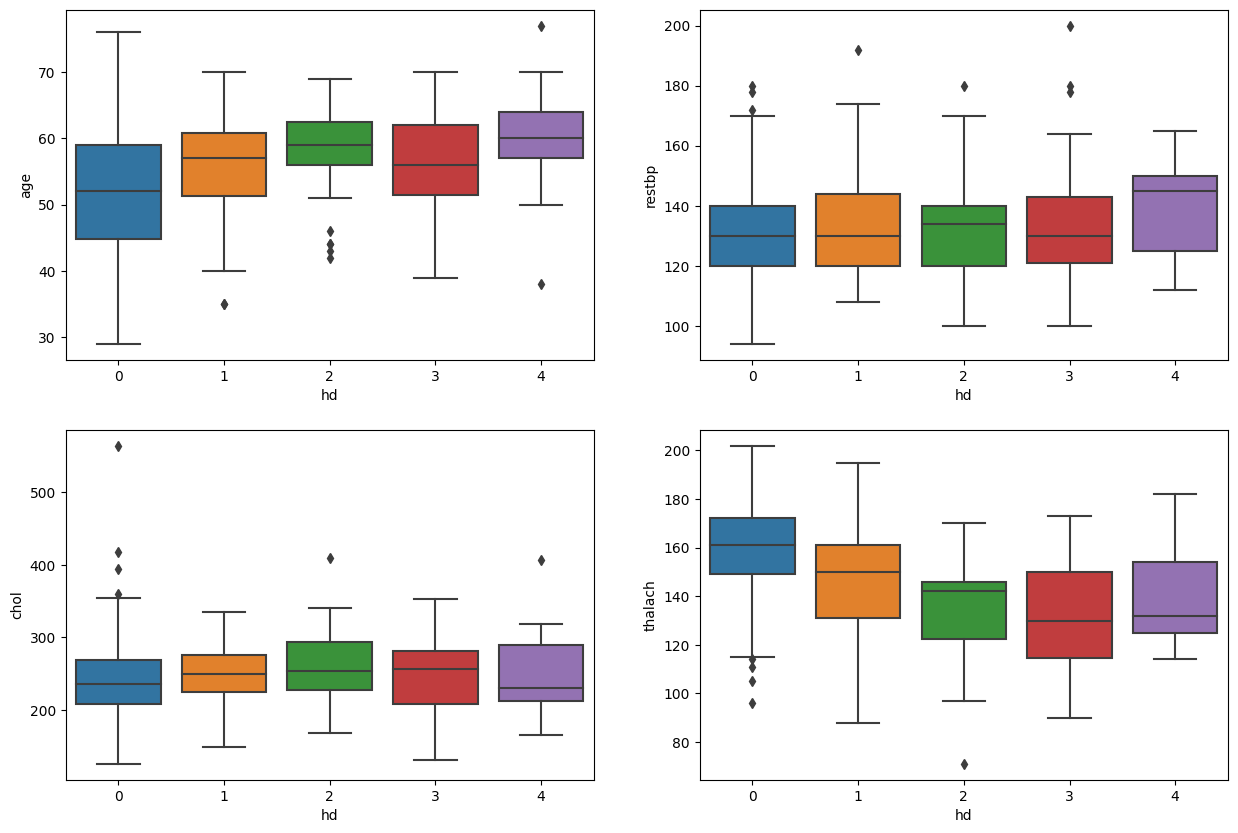

In [23]:
#Data exploration - continuous variables- 4 variables are continues
fig, ((ax1, ax2), ( ax3, ax4))=plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='hd', y='age', data=df, ax=ax1)
sns.boxplot(x='hd', y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd', y='chol', data=df, ax=ax3)
sns.boxplot(x='hd', y='thalach', data=df, ax=ax4)


In [24]:
# categorical variables
df.groupby('hd').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
hd,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160
1,54,54,54,54,54,54,54,54,54,54,54,54,54
2,35,35,35,35,35,35,35,35,35,35,35,35,35
3,35,35,35,35,35,35,35,35,35,35,35,35,35
4,13,13,13,13,13,13,13,13,13,13,13,13,13


In [25]:
df['hd'].value_counts()

hd
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [26]:
#mapping

# map 1-4 to type = 1

mapping = {0:0, 1:1, 2:1, 3:1, 4:1}
df['hd_cons'] = df['hd'].map(mapping)

df.groupby('hd_cons').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
hd_cons,,,,,,,,,,,,,,
0,160,160,160,160,160,160,160,160,160,160,160,160,160,160
1,137,137,137,137,137,137,137,137,137,137,137,137,137,137


<Axes: xlabel='hd_cons', ylabel='thalach'>

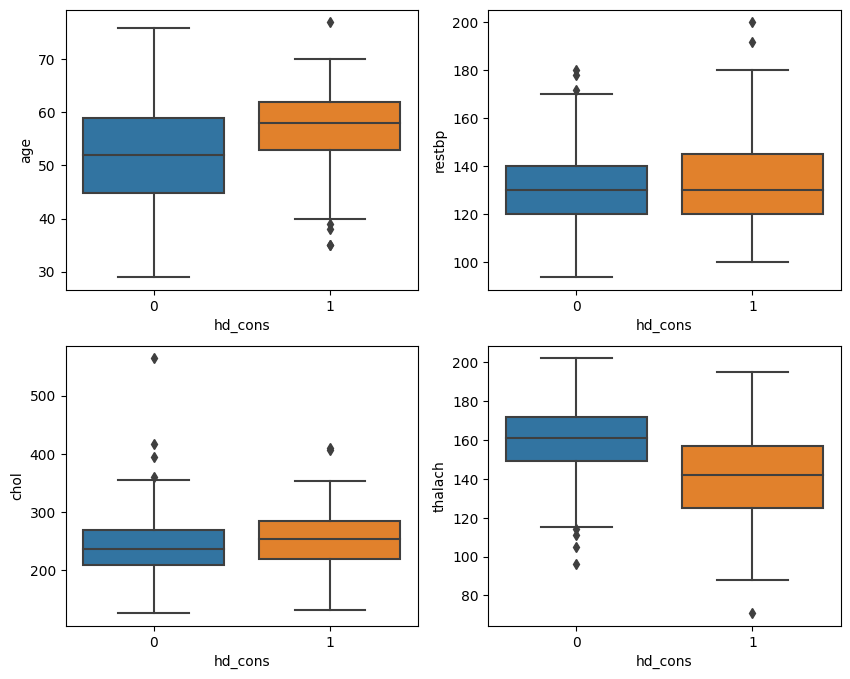

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='hd_cons',y='age', data=df, ax=ax1)
sns.boxplot(x='hd_cons',y='restbp', data=df, ax=ax2)
sns.boxplot(x='hd_cons',y='chol', data=df, ax=ax3)
sns.boxplot(x='hd_cons',y='thalach', data=df, ax=ax4)

In [29]:
df.groupby(['hd', 'sex'])['thal'].count().unstack()

sex,0.0,1.0
hd,,
0,71,89
1,9,45
2,7,28
3,7,28
4,2,11


In [30]:
df.groupby(['hd', 'cp'])['thal'].count().unstack()

cp,1.0,2.0,3.0,4.0
hd,,,,
0,16.0,40.0,65.0,39.0
1,5.0,6.0,9.0,34.0
2,1.0,1.0,4.0,29.0
3,NaN,2.0,4.0,29.0
4,1.0,NaN,1.0,11.0


In [31]:
df.groupby(['hd', 'thal'])['ca'].count().unstack()

thal,3.0,6.0,7.0
hd,,,
0,127,6,27
1,22,3,29
2,7,6,22
3,6,1,28
4,2,2,9


<Axes: xlabel='hd'>

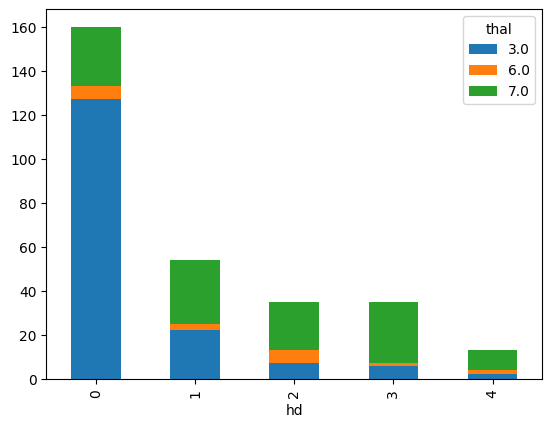

In [33]:
df.groupby(['hd', 'thal'])['ca'].count().unstack().plot(kind='bar', stacked=True)

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd', 'hd_cons'],
      dtype='object')

In [35]:
cat_columns=['sex', 'cp', 'restecg', 'slope', 'ca', 'thal', 'exang', 'fbs']


In [36]:
X=df.iloc[:,:13]
y=df.iloc[:, 13]

In [37]:
y_v2=df.iloc[:,14]
y_v2

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd_cons, Length: 297, dtype: int64

In [38]:
# get dummies at once
X_encoded=pd.get_dummies(X, columns=cat_columns, dtype=int)
X_encoded.head()

,age,restbp,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0,exang_0.0,exang_1.0,fbs_0.0,fbs_1.0
0,63.0,145.0,233.0,150.0,2.3,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,67.0,160.0,286.0,108.0,1.5,0,1,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,67.0,120.0,229.0,129.0,2.6,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
3,37.0,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
4,41.0,130.0,204.0,172.0,1.4,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [47]:
X_train, X_test, y_train, y_test=train_test_split(X_encoded, y, test_size=0.2, random_state=123)

In [48]:
dt=DecisionTreeClassifier(random_state=123)
dt=dt.fit(X_train, y_train)


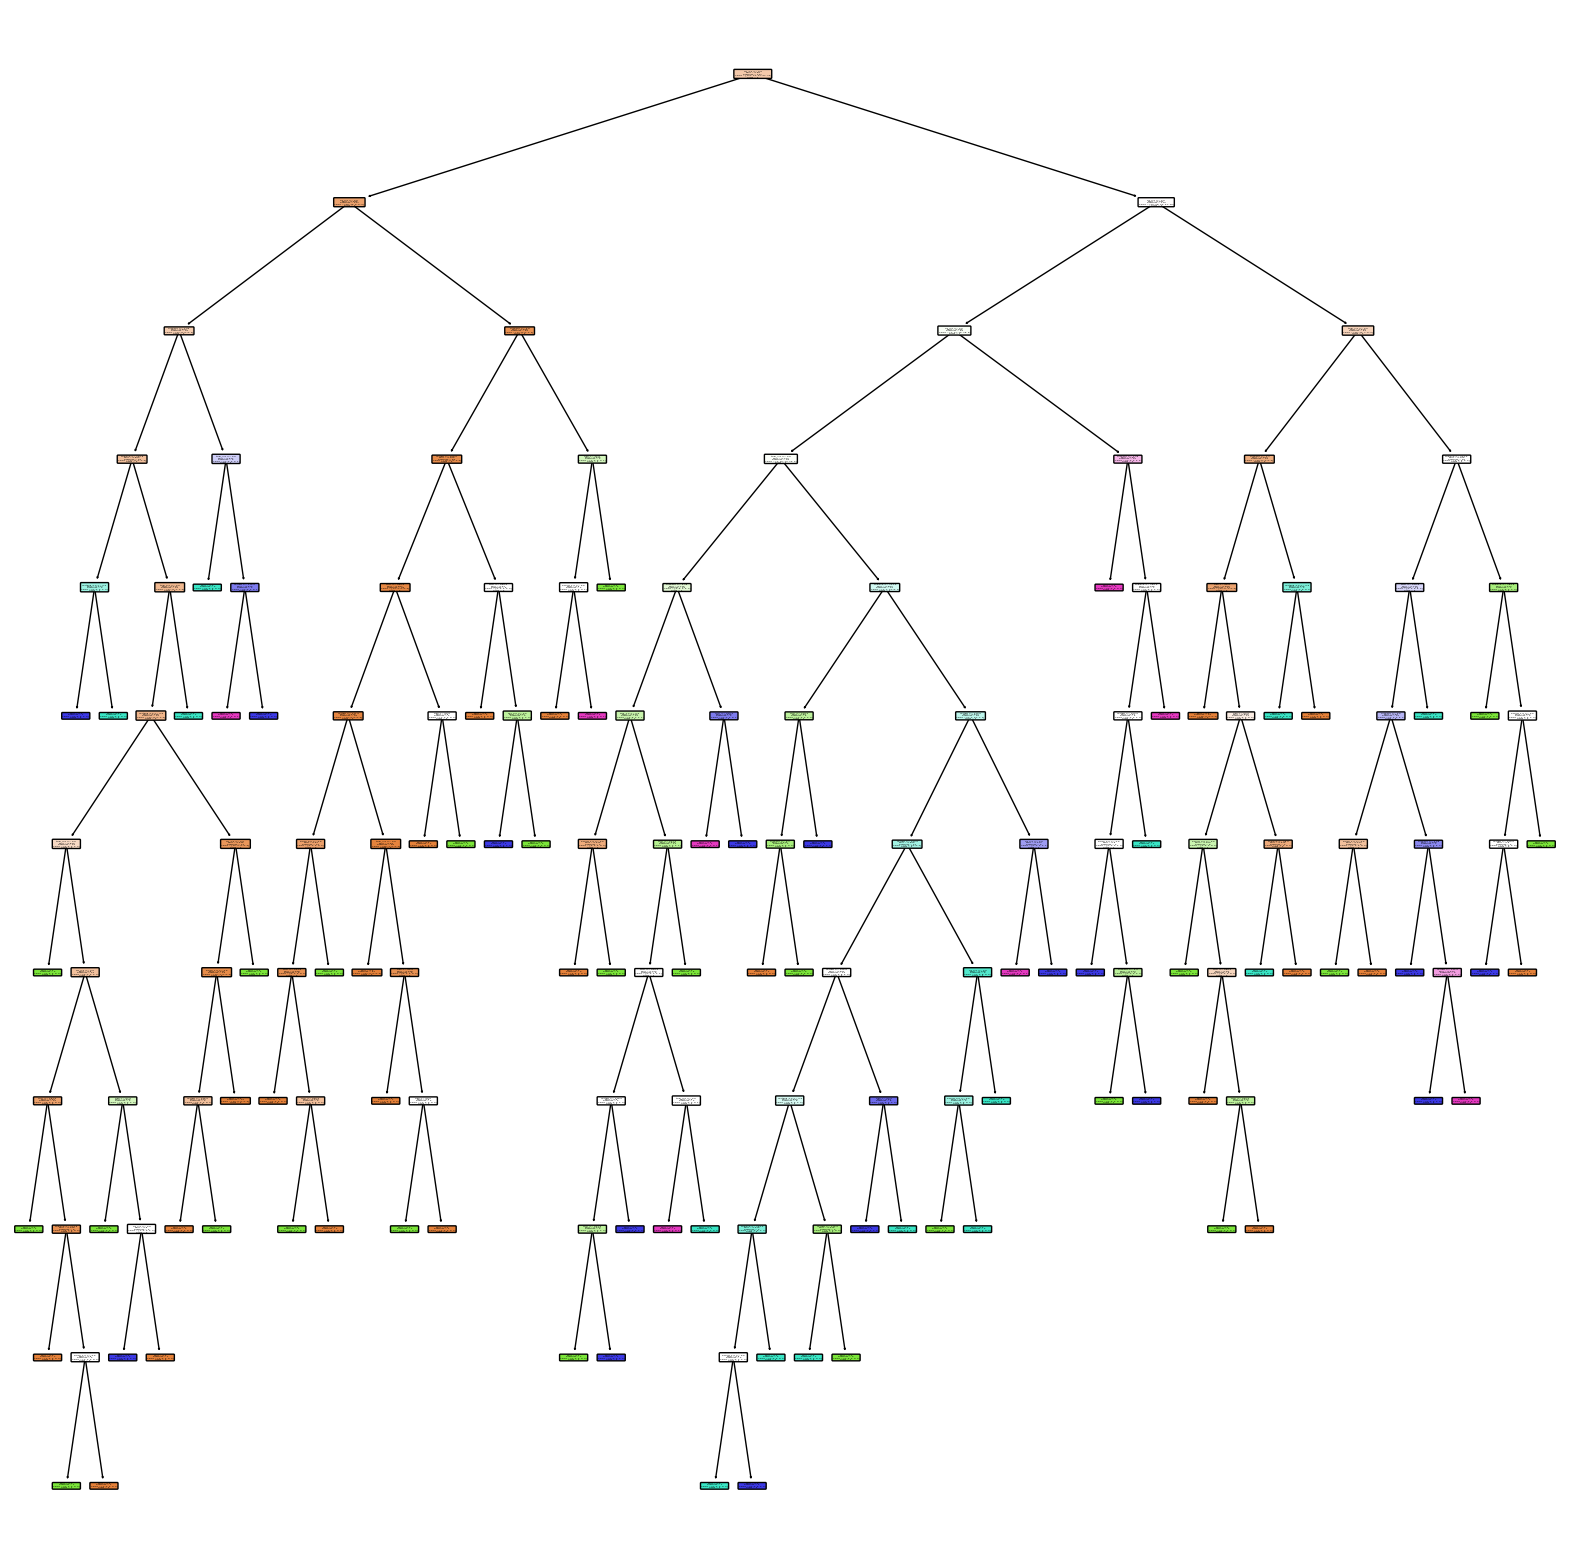

In [49]:
plt.figure(figsize=(20, 20))
plot_tree(dt, filled=True, rounded=True, class_names=['0', '1','2', '3', '4'], feature_names=X_encoded.columns);
#plt.savefig('file's path', dpi=150)

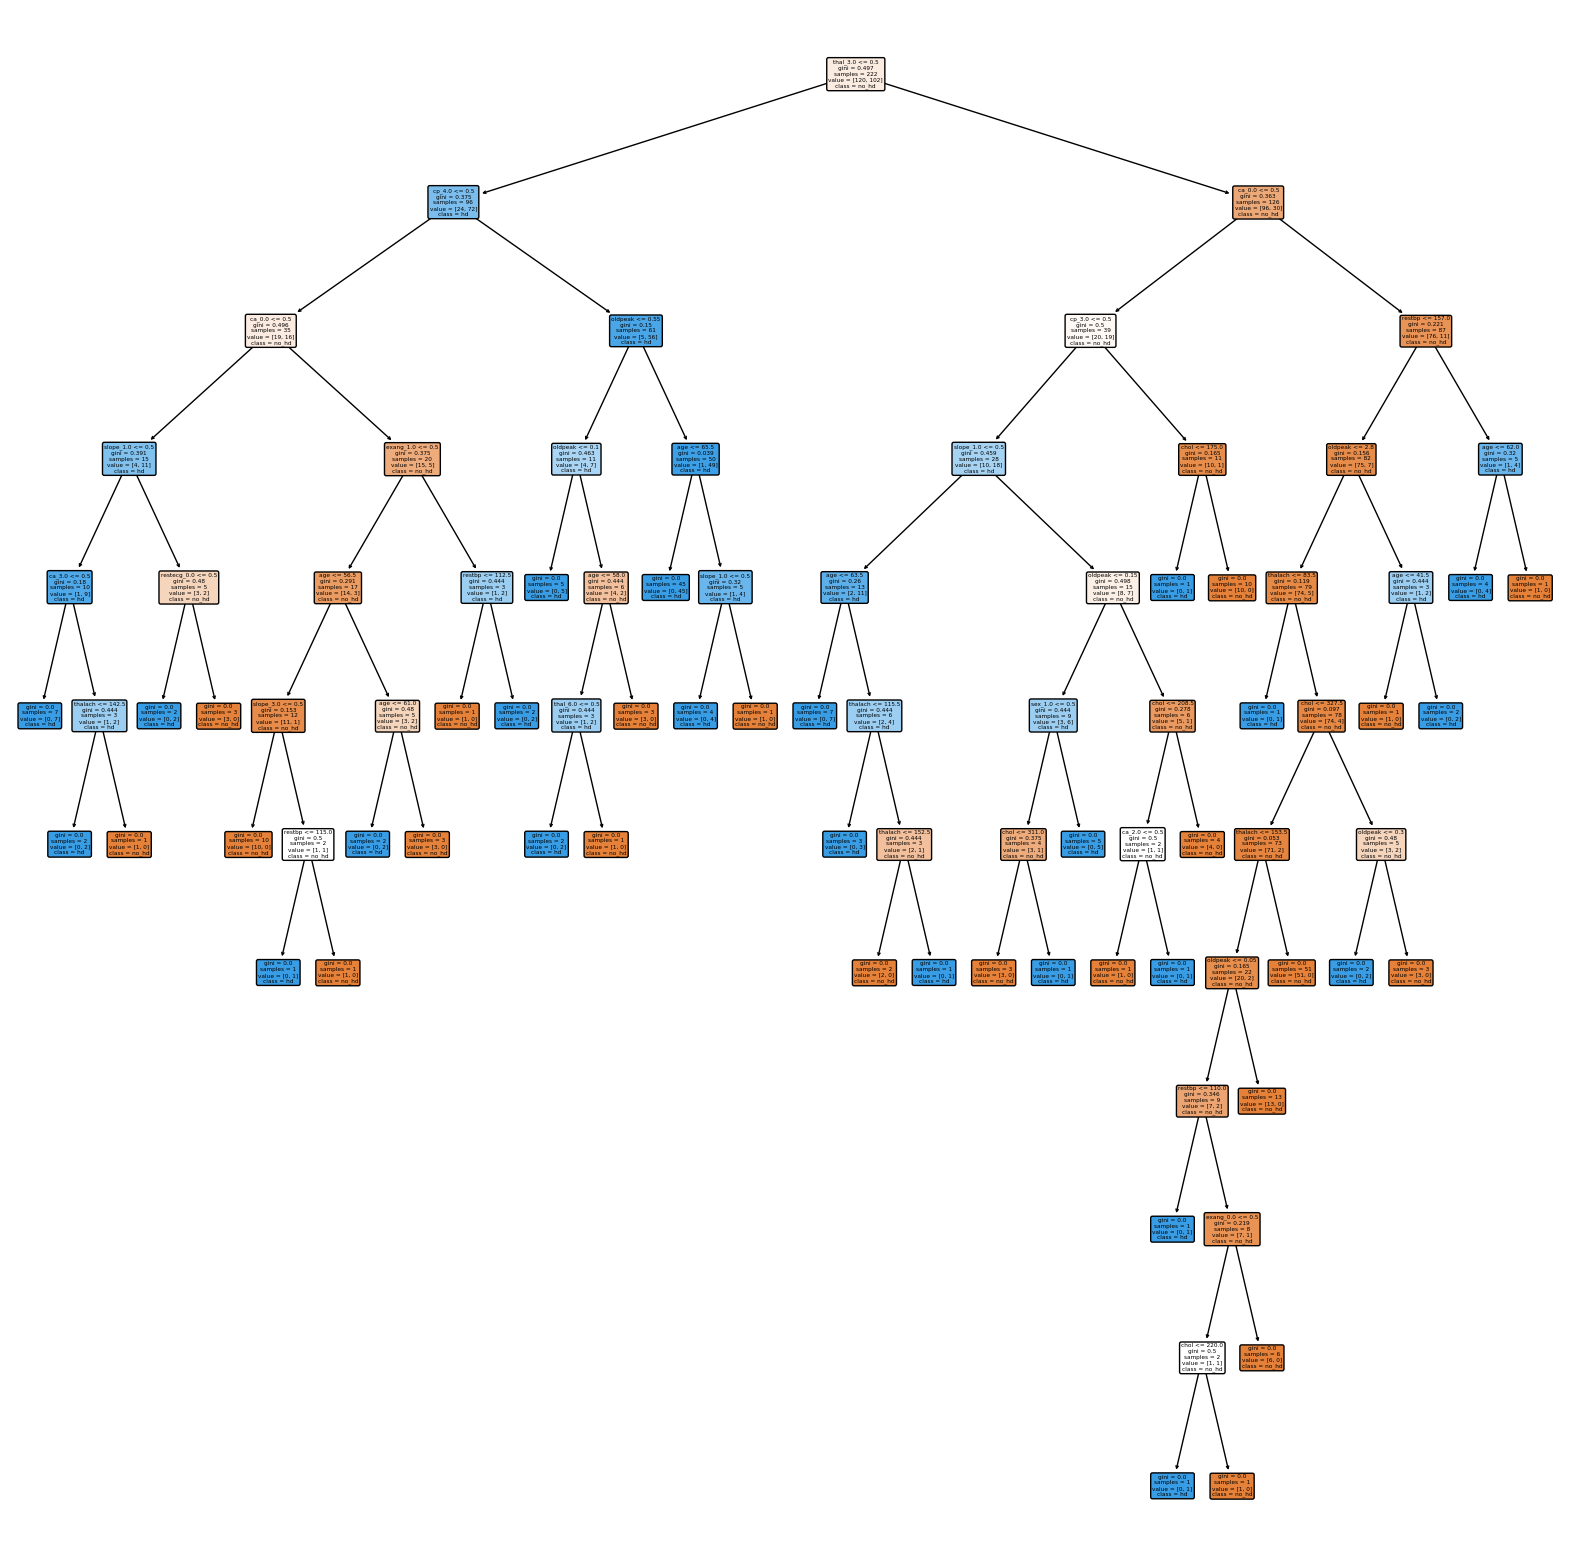

In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt.fit(X_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);
#plt.savefig('file's path', dpi=150)

In [69]:
pred=dt.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1])

In [70]:
print('v1_model:', accuracy_score(pred, y_test))
print('v2_model:', accuracy_score(pred, y_test2))

v1_model: 0.7733333333333333
v2_model: 0.7733333333333333


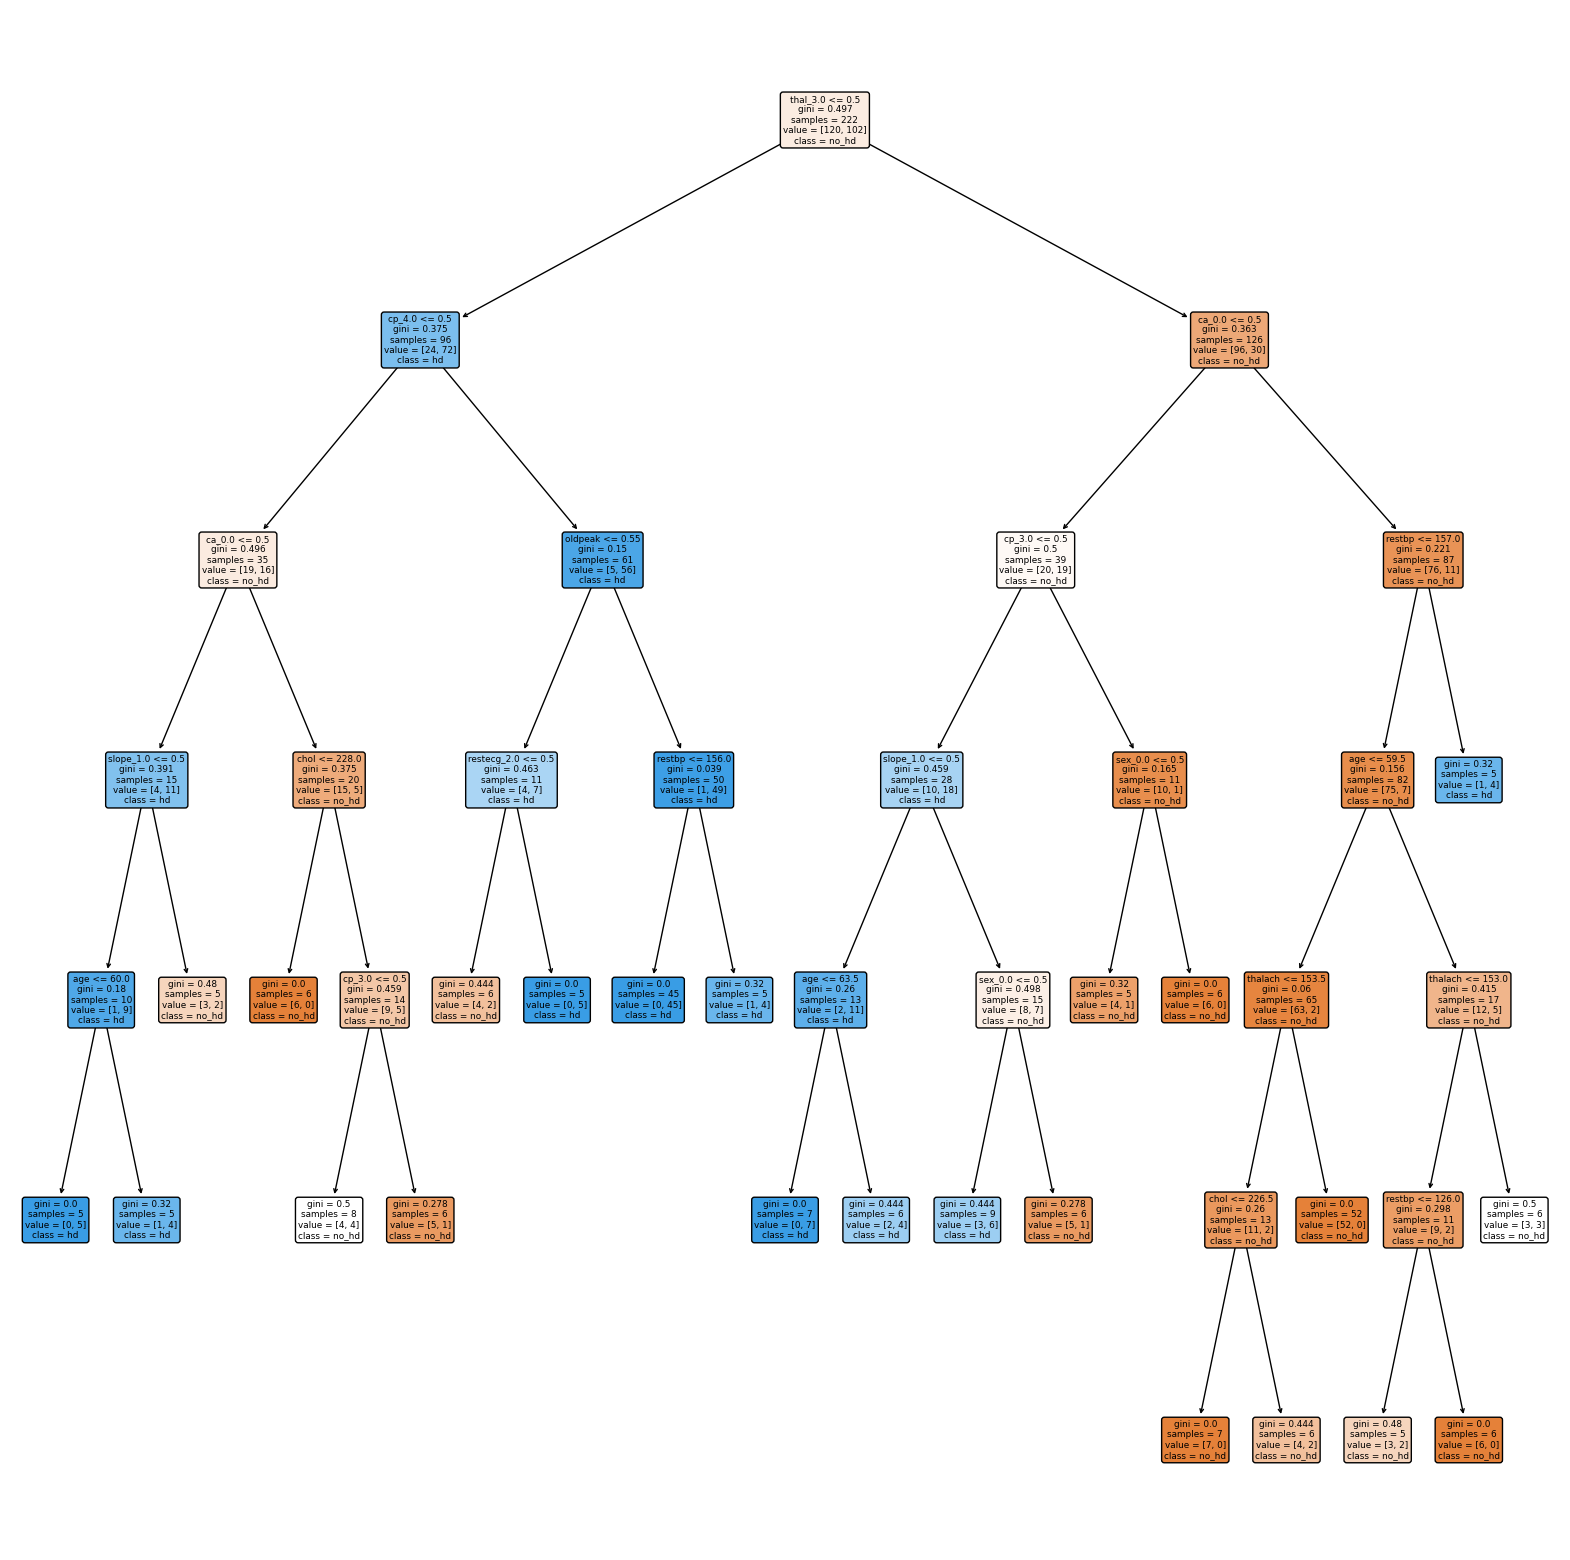

In [61]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, y_v2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth = 6, min_samples_leaf = 5,)
dt_v3 = dt_v3.fit(X_train3, y_train3)
plt.figure(figsize=(20,20))
plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);
#plt.savefig('file's path', dpi=150)

In [72]:
pred3=dt_v3.predict(X_test3)
print(accuracy_score(pred3, y_test3))

0.8266666666666667


In [74]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train3, y_train3)
pred3_knn=knn.predict(X_test3)
print(accuracy_score(pred3_knn, y_test3))

0.64
